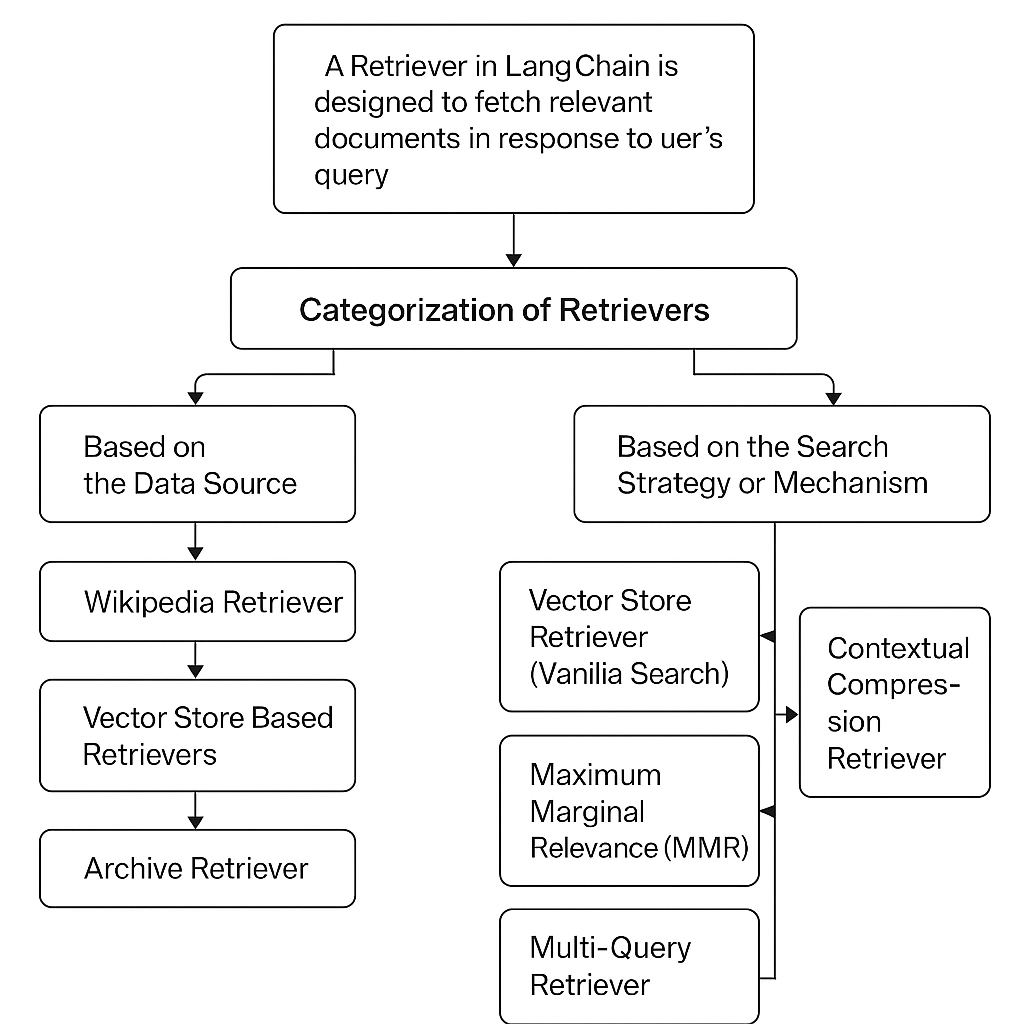

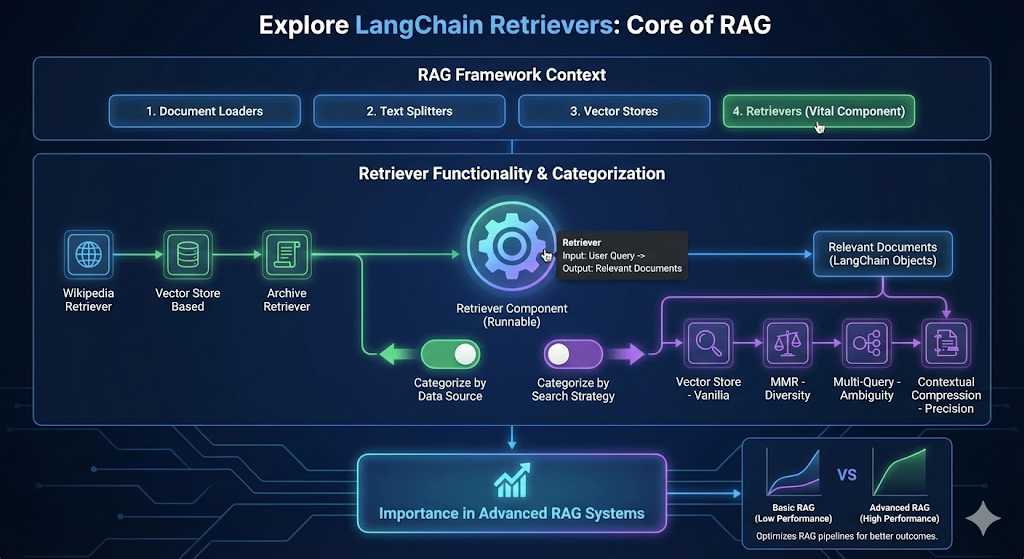

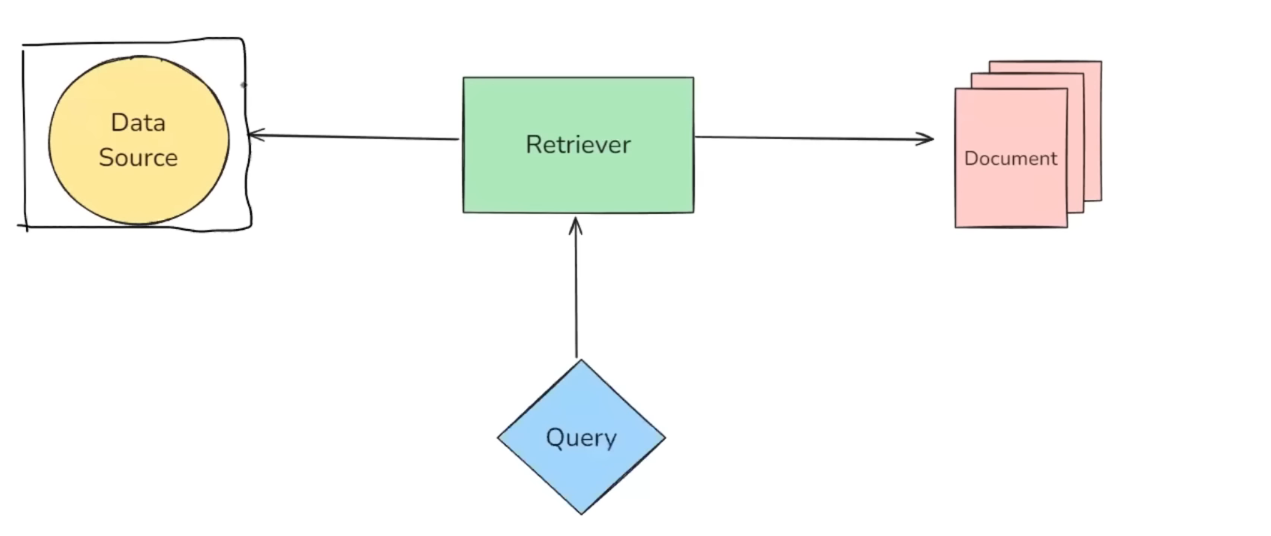

Retrievers are a vital and advanced component in the LangChain framework, particularly for building Retrieval-Augmented Generation (RAG) applications. They represent the fourth core component necessary to study RAG, following Document Loaders, Text Splitters, and Vector Stores.

Here is a comprehensive summary of Retrievers, drawing on the provided sources:

### Definition and Functionality

A Retriever is a component in LangChain designed to **fetch relevant documents from a data source in response to a user's query**.

*   **Role:** The Retriever receives a user query, interacts with a data source (which could be a vector store, an API, or something else), scans the documents, and determines which ones are most relevant to the query. It acts like a search engine that provides relevant results.
*   **Input and Output:** The Retriever functions like a function where the input is the user's query, and the output is **multiple LangChain Document Objects**.
*   **Runnables:** All Retrievers in LangChain are **runnables**, similar to models and prompts. This means they possess the capability of the `invoke` function and can be easily used to form new chains or be integrated into existing RAG chains, greatly enhancing system flexibility.

### Categorization of Retrievers

LangChain contains multiple Retrievers designed for different use cases. Retrievers can be broadly categorized in two ways:

**1. Based on the Data Source:** Retrievers are categorized based on the type of data source they interact with.

*   **Wikipedia Retriever:** This retriever takes a query and uses the Wikipedia API to search and fetch relevant articles. It performs **keyword-based matching** internally, rather than semantic search, to determine the most relevant articles. It is classified as a Retriever (and not a Document Loader) because it performs searching and decides relevance based on the query, indicating an embedded logic or "intelligence".
*   **Vector Store Based Retrievers:** These retrievers search within a **vector store** (like Chroma or Faiss) to retrieve relevant documents.
*   **Archive Retriever:** This type searches and scans research papers on a specified website.

**2. Based on the Search Strategy or Mechanism:** Retrievers can also be differentiated by the mechanism or algorithm they use to search for documents. Examples include MMR, Multi-Query Retriever, and Contextual Compression Retriever.

### Key Search Strategy Based Retrievers

The sources detail three advanced Retrievers that use unique search strategies:

#### 1. Vector Store Retriever (Vanilla Search)
The Vector Store Retriever is the **most common type**. It fetches documents from a vector store based on **semantic similarity** using vector embeddings.

*   **Mechanism:** Documents are converted into dense vectors using an embedding model and stored in the vector store. When a user enters a query, the query is also converted to a vector and compared with all document vectors using semantic search to retrieve the top similar results.
*   **Comparison to Vector Store Methods:** While a vector store inherently has the capability to perform similarity searches directly (e.g., `vector_store.similarity_search`), the benefit of using a Vector Store Retriever is that it provides a Runnable object that can be integrated into chains. More importantly, the Retriever concept allows for the connection of advanced search strategies (like MMR or Multi-Query) to the vector store.

#### 2. Maximum Marginal Relevance (MMR)
MMR is an information retrieval algorithm designed to **reduce redundancy in the retrieved results while maintaining high relevance to the query**.

*   **Problem Solved:** Normal similarity search often returns documents that are highly similar to the query but also highly similar to *each other*, leading to repetitive information (redundancy).
*   **Core Philosophy:** MMR selects results that are **not only relevant to the query but also different from each other**, ensuring a more diverse set of perspectives.
*   **Mechanism:** MMR picks the most relevant document first, and then subsequent picks are documents that are highly relevant *and* highly dissimilar from the previously selected documents. When implementing MMR, a lambda parameter (varying from 0 to 1) controls the balance between relevance and diversity; a value of 1 behaves like a normal similarity search, while a value near 0 yields highly diverse results.

#### 3. Multi-Query Retriever
The Multi-Query Retriever is designed to solve the problem of **ambiguous user queries**.

*   **Problem Solved:** When a user query is too broad or ambiguous (e.g., "How can I stay healthy?"), a standard search may retrieve low-quality or inconsistent documents because the intended meaning is unclear (e.g., diet, exercise, or stress management).
*   **Mechanism:** The retriever attempts to eliminate ambiguity by generating multiple, diverse, yet related queries from the user's original query using an **LLM**. These generated queries are then sent to a normal (similarity search) retriever, resulting in multiple sets of documents. Finally, all results are merged, duplicates are removed, and the top relevant, diverse results are presented to the user.

#### 4. Contextual Compression Retriever
This is an advanced retriever that improves retrieval quality by **compressing documents after retrieval**, retaining only the content relevant to the user's query.

*   **Problem Solved:** This is useful when documents stored in the vector store contain mixed or irrelevant information, perhaps because the text splitter separated content illogically. For example, if a document discusses photosynthesis and the Grand Canyon, but the query is only about photosynthesis, the retriever avoids returning the irrelevant parts.
*   **Mechanism:** It operates in two parts:
    1.  A **base retriever** (e.g., a similarity search retriever) fetches a set of initial documents.
    2.  A **compressor** (usually an LLM) is then applied to each retrieved document, along with the original query. The LLM uses a prompt to trim the document, discarding irrelevant content and keeping only the parts relevant to the query.
*   **Use Cases:** This retriever is useful when working with very long documents that contain mixed information, when aiming to reduce the context length supplied to an LLM, or when trying to improve the accuracy of a RAG pipeline's answer.

### Importance in Advanced RAG Systems

While many other Retrievers exist (e.g., Parent Document Retriever, Time Weighted Vector Retriever, Ensemble Retriever), the primary motivation for having so many advanced Retrievers is **to improve the performance of RAG-based systems**. If a simple RAG system performs poorly, developers frequently improve it by replacing the basic retriever with an advanced retriever to rebuild the system and achieve better outcomes.


---

### 🧠 **LangChain Retriever Examples (Code Snippet)**

```python
# --- Basic Imports ---
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OpenAIEmbeddings
from langchain.retrievers import (
    MultiQueryRetriever,
    ContextualCompressionRetriever
)
from langchain.retrievers.mmr import MMRRetriever
from langchain_community.document_loaders import WikipediaLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.document_compressors import LLMChainExtractor

# -------------------------------
# 1️⃣ Wikipedia Retriever
# -------------------------------
from langchain_community.retrievers import WikipediaRetriever

wiki_retriever = WikipediaRetriever(top_k_results=3, lang="en")
docs = wiki_retriever.get_relevant_documents("LangChain retrievers overview")
print("Wikipedia Results:", [d.metadata["title"] for d in docs])

# -------------------------------
# 2️⃣ Vector Store Retriever (Vanilla Search)
# -------------------------------
# Example setup with dummy text data
texts = [
    "LangChain retrievers fetch relevant documents.",
    "MMR helps reduce redundancy in RAG systems.",
    "MultiQuery retriever improves query diversity."
]
splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
docs = splitter.create_documents(texts)

# Create embeddings and vector store
embedding_model = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(docs, embedding_model)
vector_retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

# Retrieve documents
results = vector_retriever.get_relevant_documents("How to improve RAG retrieval?")
print("\nVector Retriever:", [r.page_content for r in results])

# -------------------------------
# 3️⃣ Maximum Marginal Relevance (MMR) Retriever
# -------------------------------
mmr_retriever = MMRRetriever.from_vectorstore(vectorstore, lambda_mult=0.5)
mmr_results = mmr_retriever.get_relevant_documents("retrieval diversity in RAG")
print("\nMMR Retriever:", [r.page_content for r in mmr_results])

# -------------------------------
# 4️⃣ Multi-Query Retriever
# -------------------------------
llm = OpenAI(temperature=0)
multiquery_retriever = MultiQueryRetriever.from_llm(
    retriever=vector_retriever,
    llm=llm
)
multi_results = multiquery_retriever.get_relevant_documents("How can retrievers improve RAG?")
print("\nMulti-Query Retriever:", [r.page_content for r in multi_results])

# -------------------------------
# 5️⃣ Contextual Compression Retriever
# -------------------------------
compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_retriever=vector_retriever,
    base_compressor=compressor
)
compressed_docs = compression_retriever.get_relevant_documents("LangChain retrievers")
print("\nContextual Compression Retriever:", [d.page_content for d in compressed_docs])

# -------------------------------
# 6️⃣ Example: Use Retriever in RAG QA Chain
# -------------------------------
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=multiquery_retriever,  # you can swap with any retriever above
    chain_type="stuff"
)

answer = rag_chain.invoke({"query": "Explain MMR in LangChain retrievers"})
print("\nRAG Answer:", answer["result"])
```

---

### 🧩 **What This Code Shows**

| Retriever                        | Key Class                         | Purpose                         |
| -------------------------------- | --------------------------------- | ------------------------------- |
| WikipediaRetriever               | `WikipediaRetriever`              | Keyword search from Wikipedia   |
| Vector Store Retriever           | `vectorstore.as_retriever()`      | Semantic search from embeddings |
| MMR Retriever                    | `MMRRetriever.from_vectorstore()` | Relevance + diversity balance   |
| Multi-Query Retriever            | `MultiQueryRetriever.from_llm()`  | Handles ambiguous queries       |
| Contextual Compression Retriever | `ContextualCompressionRetriever`  | Compresses docs for relevance   |

---


